# Real projective coordinates on data set of image patches

In this example, we explore the topology of a collection of image patches capturing line segments, which, as we will show using persistent homology and projective coordinates, are parametrized by the projective plane $RP^2$.
Each image patch is a square $d \times d$ region of pixels.
Each pixel can be thought of as a dimension, so each patch lives in $\mathbb{R}^{d \times d}$, and a collection of patches can be thought of as a Euclidean point cloud in $\mathbb{R}^{d \times d}$.

In [1]:
import matplotlib.pyplot as plt

from ripser import ripser
from persim import plot_diagrams
from dreimac import ProjectiveCoords, GeometryUtils, GeometryExamples, PlotUtils, ProjectiveMapUtils

We now examine the collection of patches which hold oriented, slightly blurry line segments at varying distances from the center of the patch.
We start by considering a small sample of these patches.
Below, the "dim" variable sets the patch resolution, and the "sigma" variable sets the blurriness (a larger sigma means blurrier line segments). 

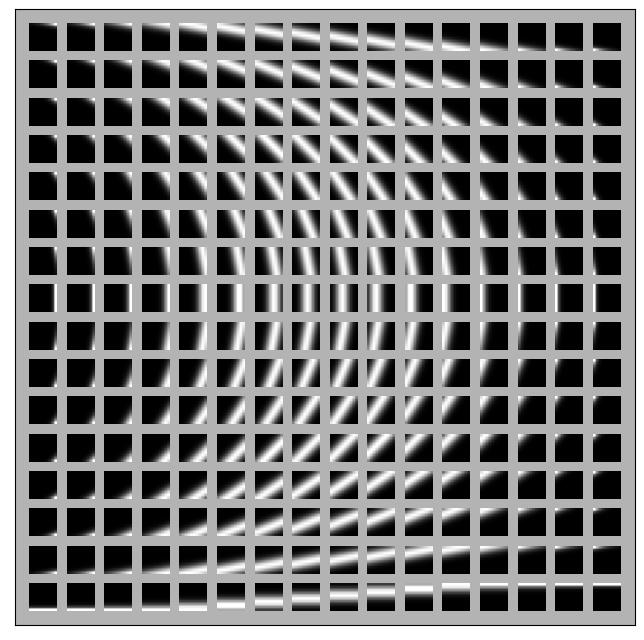

In [2]:
small_sample = GeometryExamples.line_patches(dim=10, n_angles=16, n_offsets=16, sigma=0.25)

plt.figure(figsize=(8, 8))
PlotUtils.plot_patches(small_sample, zoom=2)
plt.gca().set_facecolor((0.7, 0.7, 0.7))

Now let's compute persistence diagrams for this collection of patches with both $\mathbb{Z}/2$ coefficients and $\mathbb{Z}/3$ coefficients up to $H_2$.

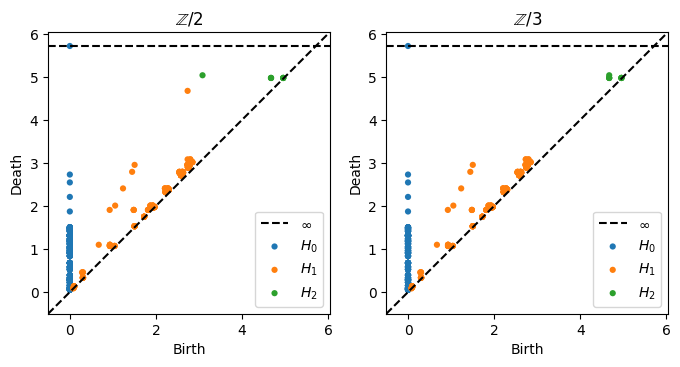

In [3]:
plt.figure(figsize=(8, 4))
for i,prime in enumerate([2,3]):
    pd = ripser(small_sample, coeff=prime, maxdim=2)['dgms']
    plt.subplot(1,2,i+1) ; plot_diagrams(pd) ; _ = plt.title("$\mathbb{Z}/" + str(prime) + "$")

There are two high-persistence classes in the persistence diagram with $\mathbb{Z}/2\mathbb{Z}$ coefficients that do not show up in the persistence diagram with $\mathbb{Z} / 3\mathbb{Z}$ coefficients.
This is the signature of the projective plane $RP^2$.
To verify this, we will map these patches to $RP^2$ using real projective coordinates.

In [4]:
X = GeometryExamples.line_patches(dim=10, n_angles=200, n_offsets=200, sigma=0.25)
pc = ProjectiveCoords(X, n_landmarks=200)
proj_coords = pc.get_coordinates(proj_dim=2, perc=0.8, cocycle_idx=0)

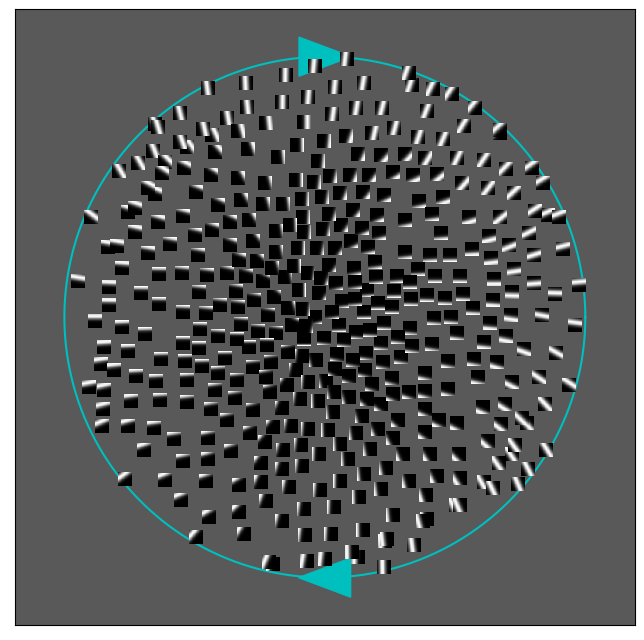

In [5]:
subsample = GeometryUtils.get_greedy_perm_pc(proj_coords, 400)['perm']
stereo_projection_dim_red_subsample = ProjectiveMapUtils.get_stereo_proj_codim1(proj_coords[subsample, :])

plt.figure(figsize=(8, 8))
PlotUtils.imscatter(stereo_projection_dim_red_subsample, X[subsample, :], 10)
_ = PlotUtils.plot_proj_boundary()